## Importing and Installing Libraries

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [50]:
dataset_path = "C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24"

In [122]:
dataset_path = "C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data"

In [123]:
# List all the audio files in the dataset
audio_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

# Display the first few audio files
print("Sample audio files:")
for audio_file in audio_files[:5]:
    print(audio_file)

Sample audio files:
C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav


In [124]:
print(len(audio_files))

2800


C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data\OAF_disgust\OAF_back_disgust.wav


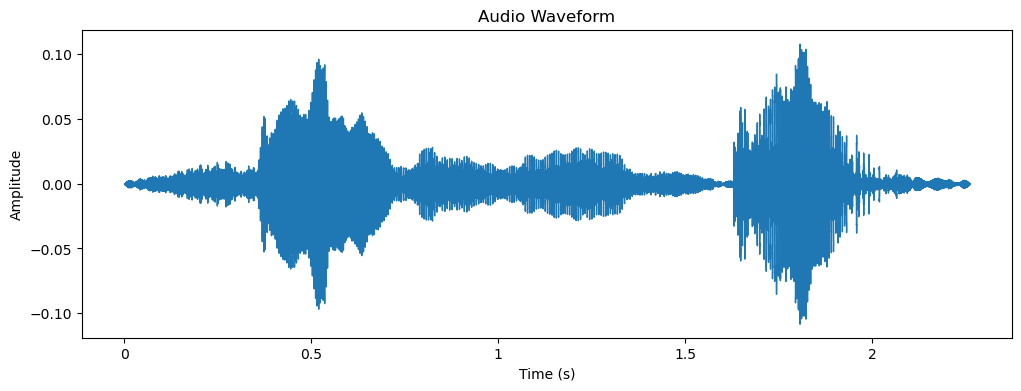

In [125]:
# Load and visualize a sample audio file
sample_audio = audio_files[200]
y, sr = librosa.load(sample_audio)
print(sample_audio)

# Plot the audio waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Data Pre-processing and Feature Extraction

In [126]:
# Function to extract features from the audio file
def extract_features(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, duration=3)  # Load the first 3 seconds of audio

        # Extract MFCCs (Mel-frequency cepstral coefficients)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Extract chroma feature (pitch and harmonic content)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)

        # Extract spectral contrast (spectral texture)
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

        # Stack all extracted features
        features = np.vstack((mfccs, chroma, spectral_contrast))

        return features  # Return the feature matrix

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

In [62]:
dataset_path = "C:/Users/MUNI SAI/Downloads/ravdess/audio_speech_actors_01-24"

all_emotion_labels=[]
all_features = []
all_intensity_labels=[]

In [63]:
# Define mappings from numerical values to words for emotions and intensities
emotion_mapping = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

intensity_mapping = {
    1: 'normal',
    2: 'strong'
}

In [64]:
# Iterate through the audio files and preprocess them
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)  
            
            # Extract emotion label and intensity from the filename
            filename_parts = file.split('-')
            emotion_label = int(filename_parts[2])  # Emotion is the third part of the filename
            intensity_label = int(filename_parts[3])  # Intensity is the fourth part of the filename
            
            # Convert numerical labels to words
            emotion_word = emotion_mapping.get(emotion_label, 'unknown')
            intensity_word = intensity_mapping.get(intensity_label, 'unknown')
            
            # Extract features from the audio file
            features = extract_features(file_path)
           

            if features is not None:
                all_features.append(features)
                all_emotion_labels.append(emotion_word)
                all_intensity_labels.append(intensity_word)


1

In [127]:
dataset_path = "C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data"

# Initialize lists to store features and labels
all_features = []
all_labels = []

In [128]:
# Iterate through the audio files and preprocess them
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            emotion_label = os.path.basename(file).split('_')[-1]  # Use the folder name as the emotion label

            # Extract features from the audio file
            features = extract_features(file_path)

            if features is not None:
                all_features.append(features)
                all_labels.append(emotion_label)

In [129]:
all_features[2].shape

(32, 67)

In [130]:
print(len(all_features))


2800


In [131]:
# Tess dataset
all_labels = np.array(all_labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

label_mapping = dict(zip(all_labels, encoded_labels))
print("Label mapping:")
print(label_mapping)

scaler = StandardScaler()
scaled_features = [scaler.fit_transform(features) for features in all_features]  # Standardize each feature matrix

Label mapping:
{'angry.wav': 0, 'disgust.wav': 1, 'fear.wav': 2, 'happy.wav': 3, 'neutral.wav': 4, 'ps.wav': 5, 'sad.wav': 6}


In [65]:
# Ravdess dataset
all_labels = np.array(all_emotion_labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

label_mapping = dict(zip(all_labels, encoded_labels))
print("Label mapping:")
print(label_mapping)

scaler = StandardScaler()
scaled_features = [scaler.fit_transform(features) for features in all_features]  # Standardize each feature matrix

Label mapping:
{'neutral': 5, 'calm': 1, 'happy': 4, 'sad': 6, 'angry': 0, 'fearful': 3, 'disgust': 2, 'surprised': 7}


## Standard Scaling

In [132]:
max_shape = max(f.shape for f in scaled_features)

padded_features = np.array([np.pad(f, ((0, max_shape[0] - f.shape[0]), (0, max_shape[1] - f.shape[1])), 'constant') for f in scaled_features])

In [133]:
print(all_features[1].shape)
print(type(scaled_features))
print(np.unique(encoded_labels))

(32, 70)
<class 'list'>
[0 1 2 3 4 5 6]


In [134]:
print(padded_features.shape)

(2800, 32, 129)


In [ ]:
for i in padded_fearues:
    

## Train Test Split

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    padded_features, encoded_labels, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [136]:
X_train.shape[1], X_train.shape[2]

(32, 129)

## LSTM Model

In [159]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the LSTM model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input shape based on your padded feature matrices
    layers.LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    layers.LSTM(64),  # Another LSTM layer with 64 units
    layers.Dense(128, activation='relu'),  # Dense layer
    layers.Dense(8, activation='softmax')  # Output layer (number of emotion classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 32, 64)            49664     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 92040 (359.53 KB)
Trainable params: 92040 (359.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## CNN Model

In [148]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Specify the input shape based on your padded feature matrices
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')  # 'num_classes' is the number of emotion classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 30, 64)            24832     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 128)           24704     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [25]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define the CNN model
# cnn_model = keras.Sequential([
#     layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
#     layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(8, activation='softmax')
# ])

# # Compile the CNN model
# cnn_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

# # Define the LSTM model
# lstm_model = keras.Sequential([
#     layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
#     layers.LSTM(64, return_sequences=True),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(8, activation='softmax')
# ])

# # Compile the LSTM model
# lstm_model.compile(optimizer='adam',
#                    loss='sparse_categorical_crossentropy',
#                    metrics=['accuracy'])

# # Train both models
# cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)
# lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)

# # Ensemble model that averages predictions from both models
# ensemble_input = layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
# cnn_output = cnn_model(ensemble_input)
# lstm_output = lstm_model(ensemble_input)
# ensemble_output = layers.average([cnn_output, lstm_output])  # Average predictions

# ensemble_model = keras.Model(inputs=ensemble_input, outputs=ensemble_output)

# # Compile the ensemble model
# ensemble_model.compile(optimizer='adam',
#                        loss='sparse_categorical_crossentropy',
#                        metrics=['accuracy'])

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
27/27 [==============================] - 5s 57ms/step - loss: 1.2871 - accuracy: 0.5357 - val_loss: 0.6803 - val_accuracy: 0.7357
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 0.4422 - accuracy: 0.8577 - val_loss: 0.2070 - val_accuracy: 0.9304
Epoch 3/50
27/27 [==============================] - 1s 31ms/step - loss: 0.1765 - accuracy: 0.9435 - val_loss: 0.1036 - val_accuracy: 0.9625
Epoch 4/50
27/27 [==============================] - 1s 33ms/step - loss: 0.1247 - accuracy: 0.9595 - val_loss: 0.0857 - val_accuracy: 0.9786
Epoch 5/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0629 - accuracy: 0.9857 - val_loss: 0.0749 - val_accuracy: 0.9732
Epoch 6/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0377 - accuracy: 0.9899 - val_loss: 0.0985 - val_accuracy: 0.9589
Epoch 7/50
27/27 [==============================] - 1s 32ms/step - loss: 0.0212 - accuracy: 0.9958 - val_loss: 0.0215 - val_accuracy: 0.9946
Epoch 8/50
27

Epoch 8/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0270 - accuracy: 0.9946 - val_loss: 0.0543 - val_accuracy: 0.9839
Epoch 9/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0206 - accuracy: 0.9952 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 10/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0151 - accuracy: 0.9970 - val_loss: 0.0618 - val_accuracy: 0.9768
Epoch 11/50
27/27 [==============================] - 1s 56ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.0592 - val_accuracy: 0.9786
Epoch 12/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.0556 - val_accuracy: 0.9821
Epoch 13/50
27/27 [==============================] - 1s 56ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9821
Epoch 14/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0619 - val_accuracy: 0.9821
Epoch 15

In [160]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor= 'val_loss',  
    patience= 3,           
    restore_best_weights= True  
)

In [161]:
# Specify the number of epochs and batch size
epochs = 100
batch_size = 32

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, callbacks = [early_stopping])

Epoch 1/100
53/53 [==============================] - 11s 138ms/step - loss: 1.4941 - accuracy: 0.3911 - val_loss: 0.9837 - val_accuracy: 0.6179
Epoch 2/100
53/53 [==============================] - 3s 57ms/step - loss: 0.8314 - accuracy: 0.6804 - val_loss: 0.6174 - val_accuracy: 0.7750
Epoch 3/100
53/53 [==============================] - 3s 54ms/step - loss: 0.4941 - accuracy: 0.8321 - val_loss: 0.3213 - val_accuracy: 0.8982
Epoch 4/100
53/53 [==============================] - 2s 46ms/step - loss: 0.3703 - accuracy: 0.8649 - val_loss: 0.2848 - val_accuracy: 0.9089
Epoch 5/100
53/53 [==============================] - 2s 45ms/step - loss: 0.3067 - accuracy: 0.9000 - val_loss: 0.2569 - val_accuracy: 0.9179
Epoch 6/100
53/53 [==============================] - 3s 53ms/step - loss: 0.2388 - accuracy: 0.9262 - val_loss: 0.2089 - val_accuracy: 0.9321
Epoch 7/100
53/53 [==============================] - 3s 61ms/step - loss: 0.1918 - accuracy: 0.9411 - val_loss: 0.1768 - val_accuracy: 0.9429
Epoc

In [162]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 [==============================] - 1s 36ms/step - loss: 0.1240 - accuracy: 0.9571
Test Accuracy: 95.71%


In [163]:
y_pred = model.predict(X_test)

18/18 [==============================] - 4s 40ms/step


In [153]:
model.save('emotion_detection_model.h5')

C:\Users\MUNI SAI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Plot the results

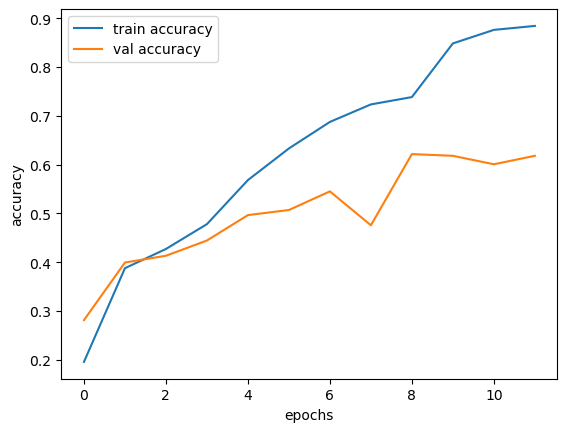

In [97]:
epochs = list(range(12))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

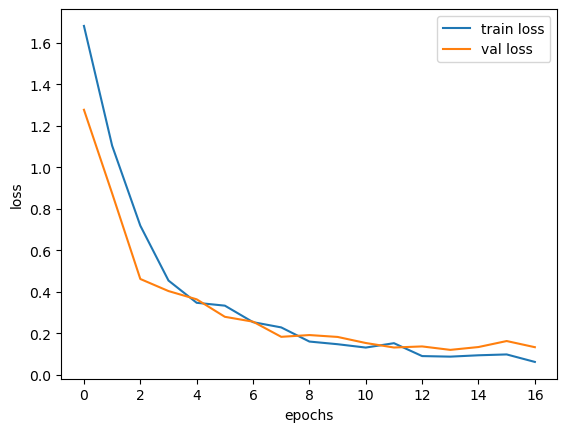

In [33]:
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [164]:
import numpy as np

# Assuming y_pred is one-hot encoded predictions
y_pred_classes = np.argmax(y_pred, axis=1)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_classes, normalize=True)

0.9571428571428572

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.96      1.00      0.98        81
           2       0.97      0.98      0.97        98
           3       0.89      0.94      0.92        71
           4       0.98      0.98      0.98        91
           5       0.97      0.94      0.96        72
           6       1.00      0.97      0.99        69

    accuracy                           0.96       560
   macro avg       0.96      0.96      0.96       560
weighted avg       0.96      0.96      0.96       560



In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        81
           1       0.92      0.96      0.94        81
           2       1.00      0.97      0.99        72
           3       0.96      0.88      0.92        86
           4       1.00      0.97      0.98        67
           5       0.90      0.93      0.91        83
           6       0.98      1.00      0.99        90

    accuracy                           0.96       560
   macro avg       0.96      0.96      0.96       560
weighted avg       0.96      0.96      0.96       560



## Live Predictions

In [48]:
import keras
import librosa
import numpy as np


EXAMPLES_PATH="C:/Users/MUNI SAI/Downloads/TESS Toronto emotional speech set data/YAF_sad/YAF_wife_sad.wav"
MODEL_DIR_PATH= "C:/Users/MUNI SAI/Downloads/emotion_detection_model.h5"

class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        self.path = MODEL_DIR_PATH
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file, sr=None)  # Ensure you specify the sampling rate

        # Extract MFCC features with 32 time steps (matching the model's input shape)
        # Define the target shape for MFCC features
        target_shape = (32, 130)  # 32 MFCC coefficients and 130 time steps

        # Extract MFCC features with 32 coefficients (matching the model's input shape)
        mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=32)

        # Ensure the MFCC features have the expected shape (32, 129)
        if mfccs.shape[1] < 129:
            mfccs = np.pad(mfccs, ((0, 0), (0, 129 - mfccs.shape[1])), mode='constant')

        # Expand dimensions to match the expected input shape (None, 32, 129)
        x = np.expand_dims(mfccs, axis=0)


        predictions = self.loaded_model.predict(x)
        predicted_class = np.argmax(predictions, axis=1)[0]
        print("Prediction is", " ", self.convert_class_to_emotion(predicted_class))


    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """

        label_conversion = {'0': 'angry',
                            '1': 'calm',
                            '2': 'disgust',
                            '3': 'fearful',
                            '4': 'happy',
                            '5': 'neutral',
                            '6': 'sad',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label


if __name__ == '__main__':
    live_prediction = LivePredictions(file=EXAMPLES_PATH )
    live_prediction.loaded_model.summary()
    live_prediction.make_predictions()
#     live_prediction = LivePredictions(file=EXAMPLES_PATH )
#     live_prediction.make_predictions()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 129)]            0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 8)                    165512    ['input_4[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 8)                    312968    ['input_4[0][0]']             
                                                                                                  
 average (Average)           (None, 8)                    0         ['sequential_1[0][0]',        
                                                                     'sequential_2[0][0]']    

In [25]:
import numpy as np
import pyaudio
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras

# Load your trained LSTM model
model = keras.models.load_model("C:/Users/MUNI SAI/Downloads/emotion_detection_model.h5")  # Replace with the path to your trained model file

# Constants for audio recording
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 3  # Adjust the recording duration as needed

# Function to record audio and make predictions
def live_emotion_prediction():
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("Recording...")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("Finished recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    # Convert the audio data to a numpy array
    audio_data = np.frombuffer(b''.join(frames), dtype=np.float32)

    # Extract audio features (MFCCs, chroma, spectral contrast)
    features = extract_features(audio_data)

    # Make a prediction using the trained model
    if features is not None:
        print(features.shape)
        # Make a prediction using the trained model
        predictions = model.predict(features)
        emotion_label = np.argmax(predictions)

        # Map the predicted label to the corresponding emotion
        predicted_emotion = label_encoder.inverse_transform([emotion_label])[0]

        print(f"Predicted Emotion: {prediction}")

    else:
        print("Error extracting features from audio data")
        


# Function to extract audio features
def extract_features(audio_data):
    try:
        # Extract MFCCs (Mel-frequency cepstral coefficients)
        mfccs = librosa.feature.mfcc(y=audio_data, sr=RATE, n_mfcc=13)
        

        

        # Extract chroma feature (pitch and harmonic content)
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=RATE)

        # Extract spectral contrast (spectral texture)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=RATE)

        # Stack all extracted features
        features = np.vstack((mfccs, chroma, spectral_contrast))

        return features  # Return the feature matrix

    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return None

if __name__ == "__main__":
    live_emotion_prediction()

Recording...
Finished recording
Error extracting features: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 826 and the array at index 1 has size 259
Error extracting features from audio data


C:\Users\MUNI SAI\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
